In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
import gc
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [2]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

contador = 0
data_reviews = []

n = 3
for l in parse('C:\\Users\\Tati\\source\\repos\\acamica-datasets\\steam_reviews.json.gz'):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
        contador += 1

data_reviews = pd.DataFrame(data_reviews)

data_reviews.head()

#data_reviews.to_csv('C:\\Users\\Tati\\source\\repos\\acamica-ds-spr3\\data_reviews.csv')
del data_reviews

In [3]:
data_reviews= pd.read_csv('C:\\Users\\Tati\\source\\repos\\acamica-datasets\\data_reviews.csv')

In [4]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)
        
data_games = []
for l in parse('C:\\Users\\Tati\\source\\repos\\acamica-datasets\steam_games.json.gz'):
        data_games.append(l)

In [5]:
data_games = pd.DataFrame(data_games)

### DESCRIPCIÓN DE FEATURES DATA_REVIEWS
username: Nombre del usuario que ha dejado la reseña

hours: Cantidad de horas jugadas (acumuladas) en el juego al cual se le ha hecho la reseña

products: Cantidad de otros juegos probados

product_id: Identificacion númerica del juego reseñado

page_order: Número de página en el cual se encuentra el juego dentro de la plataforma

date: Fecha en la cual se ha creado la reseña

text: Comentario sobre el juego

early_access: Si es True significa que el juego puede ser adquirido durante su etapa de desarrollo

page: No es interpretable

user_id: Identificacion númerica del usuario creador de la reseña

found_funny: Cantidad de calificaciones positivas creadas por otros usuarios

compensation: Variable no interpretable dada la cantidad de valores nulos contenidos en ella

In [6]:
data_reviews.head()

,Unnamed: 0,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id
0,0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,1,₮ʜᴇ Wᴀʀᴛᴏɴ,51.1,769.0,328100,0,2017-12-27,looks like a facebook game,False,1,NaN,NaN,NaN
2,2,hello?<,14.6,2.0,328100,1,2017-10-16,Better than Minecraft,False,1,2.0,Product received for free,NaN
3,3,Cyderine916,5.0,64.0,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN
4,4,DarklyThinking,16.6,577.0,35140,1,2018-01-04,Still worth playing in 2018.\nProbably my favo...,False,1,NaN,NaN,7.656120e+16


### DESCRIPCIÓN DE FEATURES INCLUIDOS EN DATA_GAMES
desarrollador: Creador del juego

genres: Géneros, caracteristicas del juego

app_name: Editor del juego

title: Nombre del juego

url: Dirección web donde encontrarlo

release_date: Fecha de lanzamiento

tags: Etiquetas relacionadas con el juego

discount_price: Precio con descuento incluido

reviews_url: Dirección web donde encontrar las reseñas sobre el juego

specs: Especificaciones

price: Precio sin descuento

early_access: Si es True significa que el juego puede ser adquirido durante su etapa de desarrollo

id: Identificacion númerica del juego publicado

sentiment: Emoción promedio generada en los usuarios

metascore: Puntaje promedio recibido por los usuarios

In [7]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


### Analisis exploratorio DATA_REVIEWS

Vemos cantidad de filas, columns e informacion sobre cada feature

In [8]:
data_reviews.shape

(7793069, 13)

Data importante para definir los limites del analisis.

In [9]:
data_reviews.loc[:,['hours','products']].describe().round(2)

,hours,products
count,7766532.00,7778108.00
mean,111.84,236.48
std,392.86,485.79
min,0.00,1.00
25%,4.00,45.00
50%,15.30,110.00
75%,59.70,246.00
max,42100.70,18188.00


In [10]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793069 entries, 0 to 7793068
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   username      object 
 2   hours         float64
 3   products      float64
 4   product_id    int64  
 5   page_order    int64  
 6   date          object 
 7   text          object 
 8   early_access  bool   
 9   page          int64  
 10  found_funny   float64
 11  compensation  object 
 12  user_id       float64
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 720.9+ MB


Vemos los datos null

In [11]:
data_reviews.isna().sum()

Unnamed: 0            0
username            208
hours             26537
products          14961
product_id            0
page_order            0
date                  0
text              17972
early_access          0
page                  0
found_funny     6592313
compensation    7647446
user_id         4616846
dtype: int64

### De los DATOS analizados hay valores que no vamos a considerar, tales como:

* Usuarios con menos de 15 horas jugadas (falta de expertise)

* Usuarios con menos 30 juegos (falta de expertise)

* Usuarios que jugaron mas de 100 horas a un juego (exceso, claramente el juego le gusta)

* Usuarios que jugaron mas de 300 juegos. (es demasiado y se sale del perfil que queremos considerar)

In [12]:
data_reviews2=data_reviews[(data_reviews.products>15) & (data_reviews.products<300)]
data_reviews3=data_reviews2[(data_reviews2.hours>10) & (data_reviews2.hours<100)]
data_reviews3.dropna(subset=['text'], inplace=True)
data_reviews3.shape

<ipython-input-12-d518540366a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reviews3.dropna(subset=['text'], inplace=True)


(2313195, 13)

In [13]:
del data_reviews2

In [14]:
data_reviews3.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
data_reviews3.dropna(subset=['text'], inplace=True)
data_reviews3.dropna(subset=['username'], inplace=True)

In [16]:
#data_reviews3.drop("Unnamed: 0", axis=1, inplace=True)

In [17]:
data_reviews3.isna().sum()

username              0
hours                 0
products              0
product_id            0
page_order            0
date                  0
text                  0
early_access          0
page                  0
found_funny     2002343
compensation    2280484
user_id         1286433
dtype: int64

In [18]:
data_reviews3.head(10)

,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id
13,MR_SERENITY,14.8,147.0,35140,2,2018-01-03,aweosme game great story and some epic moments...,False,1,NaN,NaN,7.656120e+16
15,Duha Nubie,11.3,73.0,35140,4,2018-01-03,first debut feel sweet,False,1,NaN,NaN,NaN
16,The Undead StalkeR,17.0,87.0,35140,5,2018-01-03,9/10\nEven after all these years. this game re...,False,1,NaN,NaN,7.656120e+16
32,Mono,14.1,54.0,506510,1,2017-12-27,A Charming game with colourful pixel graphics ...,False,1,NaN,NaN,7.656120e+16
39,xiodeni,18.4,18.0,35140,6,2018-01-03,I definitely recommend this game. I absolutely...,False,1,NaN,NaN,NaN
57,Uncle-Noob,24.7,37.0,350280,3,2018-01-04,"I really like this game, but no one plays it. ...",False,1,NaN,NaN,NaN
71,CatCookieHearT,12.7,211.0,620900,4,2017-06-25,I really enjoy Witchinour.\nThe dev says it co...,False,1,NaN,NaN,NaN
76,Aureus,13.2,260.0,506510,3,2017-12-26,Let's start with a very important statement: S...,False,1,NaN,NaN,NaN
83,WindySilver,11.2,75.0,431320,3,2016-06-04,"Edit: Having a good laptop for gaming now, I'v...",False,1,NaN,NaN,NaN
89,Bushi Neko,10.7,266.0,450230,0,2017-01-25,It is worth watching. Its not a great film. Bu...,False,1,NaN,NaN,7.656120e+16


Elimino aquellas instancias que no tengan usuario

In [19]:
empty_indexs=data_reviews3[data_reviews3.username.isna()].index
empty_indexs

Int64Index([], dtype='int64')

In [20]:
data_reviews3.drop(empty_indexs,inplace=True)

In [21]:
data_reviews3.hours.isna().sum()

0

Filtro aquellas columnas que no considero utiles para le analisis

In [22]:
data_reviews4=data_reviews3.loc[:,['username','hours','products','product_id','text']]
data_reviews4.isna().sum()
del data_reviews3
data_reviews4

,username,hours,products,product_id,text
13,MR_SERENITY,14.8,147.0,35140,aweosme game great story and some epic moments...
15,Duha Nubie,11.3,73.0,35140,first debut feel sweet
16,The Undead StalkeR,17.0,87.0,35140,9/10\nEven after all these years. this game re...
32,Mono,14.1,54.0,506510,A Charming game with colourful pixel graphics ...
39,xiodeni,18.4,18.0,35140,I definitely recommend this game. I absolutely...
...,...,...,...,...,...
7793031,LostWhispers,92.1,150.0,252490,WARNING!! you will burn way to many hours in ...
7793032,Rick Sanchez C-132,63.0,37.0,252490,This game is already one of the most fun and i...
7793049,Crit_Magnet_,16.0,192.0,252490,"So much fun, once you get set up!"
7793061,worldoftanks,82.2,91.0,252490,O yes good waiting long time


Realizamos algunos graficos para ver la distribucion de algunas variables

<AxesSubplot:xlabel='products'>

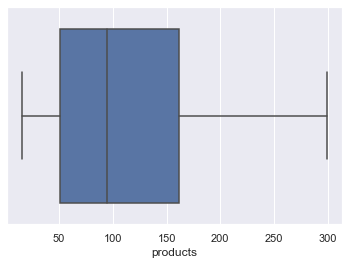

In [23]:
sns.boxplot(x = data_reviews4.products)

Podemos observar que el 50% de los valores de "products" estan entre 50 y 90 aprox. 
Aquellos que pertenecen al 1er cuartil (25% inferior) van de 0 a 50 y el 25% superior (4to cuartil) esta entre 120 aprox y 300.
Estos numeros indican que el mayor porcentaje de usuarios se situa entre 50 y 160 productos aprox.

<AxesSubplot:xlabel='hours'>

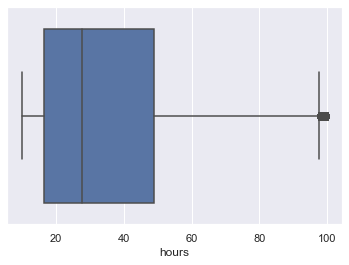

In [24]:
sns.boxplot(x = data_reviews4.hours)

Podemos observar que el 50% de los valores de "hours" estan entre 17 y 50 aprox. 
Aquellos que pertenecen al 1er cuartil (25% inferior) van de 0 a 17 y el 25% superior (4to cuartil) esta entre 50 y 95 aprox.
Estos numeros indican que el mayor porcentaje de usuarios se situa entre 25 y 50 hours aprox.

In [25]:
data_reviews4.products

13         147.0
15          73.0
16          87.0
32          54.0
39          18.0
           ...  
7793031    150.0
7793032     37.0
7793049    192.0
7793061     91.0
7793066    288.0
Name: products, Length: 2313124, dtype: float64

<AxesSubplot:xlabel='products', ylabel='Density'>

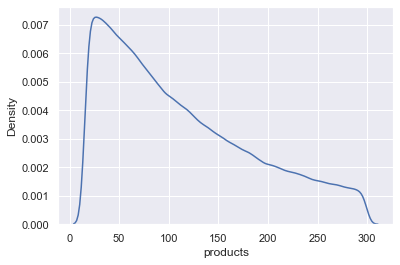

In [26]:
sns.kdeplot(data=data_reviews4.products)

<AxesSubplot:xlabel='hours', ylabel='Density'>

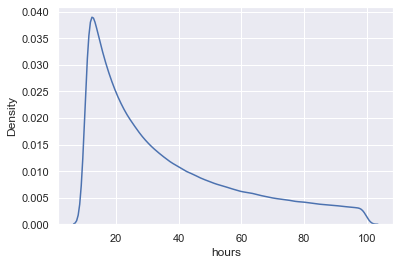

In [27]:
sns.kdeplot(data=data_reviews4.hours)

#### Para completar el analisis exploratorio de data_reviews:

In [28]:
data_reviews4.username.value_counts().mean()

2.147308813427155

1. Que cantidad de reviews deja en promedio cada usuario?

In [29]:
reviews_prom=data_reviews4.username.value_counts().mean()
print(f'El promedio de reviews por usuario es:{reviews_prom}')

El promedio de reviews por usuario es:2.147308813427155


2. Dentro de los limites establecidos, cuales son los usuarios que mas reviews dejaron?

In [30]:
data_reviews4['username'].value_counts()[0:15].index.tolist()

['Alex',
 '123',
 'Chris',
 'Red',
 'Ghost',
 'Sam',
 'Jack',
 'Nick',
 'Dan',
 'Tom',
 'Matt',
 'Wolf',
 'John',
 'ุ',
 'James']

3. Dentro de los limites establecidos, cuales son los usuarios que menos reviews dejaron?

In [31]:
data_reviews4['username'].value_counts()[-15:-1].index.tolist()

['AxE216',
 'Roland the Farter',
 'Ogrimm',
 'Accurate Italian Bread',
 'Jpeger',
 'Whateverdude',
 'KRONEA_BLYAT',
 'Wattage',
 'Skrubby',
 'Uncle Rellah (No Relation)',
 'Darkfly The Unholy Demon',
 '"Come to the Chopper"',
 'Bevii3',
 'Leroy27']

4. Cual es el juego que mas reviews tuvo? cual el que menos reviews tuvo?

In [32]:
data_reviews4.product_id.mode()

0    391540
dtype: int64

In [33]:
data_reviews4.username.value_counts().describe()

count    1.077220e+06
mean     2.147309e+00
std      3.932663e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.750000e+02
Name: username, dtype: float64

(0.0, 10.0)

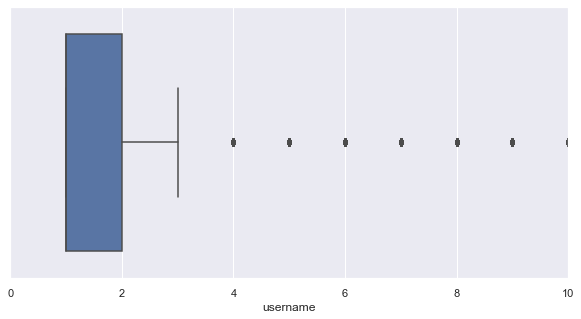

In [34]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x=data_reviews4.username.value_counts())
ax.set_xlim([0,10])

A continuación determino por medio de TextBlob, la polaridad de un review analizando la variable Text.
La Polaridad es un número décimal que oscila entre -1 y 1, donde 1 significa que el comentario transmite un sentimiento positivo y, -1 un sentimiento negativo

In [35]:
len(data_reviews4.text)

2313124

In [36]:
data_reviews4.reset_index(inplace=True)

data_reviews4

,index,username,hours,products,product_id,text
0,13,MR_SERENITY,14.8,147.0,35140,aweosme game great story and some epic moments...
1,15,Duha Nubie,11.3,73.0,35140,first debut feel sweet
2,16,The Undead StalkeR,17.0,87.0,35140,9/10\nEven after all these years. this game re...
3,32,Mono,14.1,54.0,506510,A Charming game with colourful pixel graphics ...
4,39,xiodeni,18.4,18.0,35140,I definitely recommend this game. I absolutely...
...,...,...,...,...,...,...
2313119,7793031,LostWhispers,92.1,150.0,252490,WARNING!! you will burn way to many hours in ...
2313120,7793032,Rick Sanchez C-132,63.0,37.0,252490,This game is already one of the most fun and i...
2313121,7793049,Crit_Magnet_,16.0,192.0,252490,"So much fun, once you get set up!"
2313122,7793061,worldoftanks,82.2,91.0,252490,O yes good waiting long time


In [37]:
polarity_list=[]
exceptions=[]
for i in range(len(data_reviews4.text)):
    frase=TextBlob(data_reviews4.text.iloc[i])
    polarity=frase.sentiment.polarity
    polarity_list.append(polarity)

In [38]:
len(exceptions)

0

In [39]:
data_reviews4['Polarity']=pd.Series(polarity_list)

In [40]:
data_reviews4.to_csv('C:\\Users\\Tati\\source\\repos\\acamica-ds-spr3\\data_reviews4.csv')
del data_reviews4

In [41]:
data_reviews4 = pd.read_csv('C:\\Users\\Tati\\source\\repos\\acamica-ds-spr3\\data_reviews4.csv')

In [42]:
data_reviews4.head()

,Unnamed: 0,index,username,hours,products,product_id,text,Polarity
0,0,13,MR_SERENITY,14.8,147.0,35140,aweosme game great story and some epic moments...,0.375000
1,1,15,Duha Nubie,11.3,73.0,35140,first debut feel sweet,0.300000
2,2,16,The Undead StalkeR,17.0,87.0,35140,9/10\nEven after all these years. this game re...,0.471429
3,3,32,Mono,14.1,54.0,506510,A Charming game with colourful pixel graphics ...,0.300000
4,4,39,xiodeni,18.4,18.0,35140,I definitely recommend this game. I absolutely...,0.033333


In [43]:
correlation=data_reviews4.loc[:,['hours','products','Polarity']].corr()
correlation

,hours,products,Polarity
hours,1.000000,-0.038893,0.003242
products,-0.038893,1.000000,-0.011860
Polarity,0.003242,-0.011860,1.000000


<AxesSubplot:>

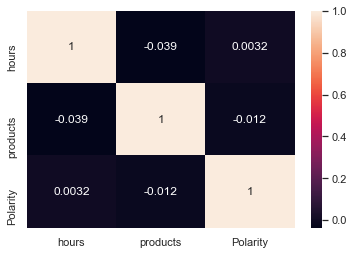

In [44]:
sns.heatmap(correlation, cbar = True,annot = True)

No existe ninguna relación linal entre un comentario positivo dejado por el usuario a un juego y la cantidad de horas jugadas, ni otros juegos probados. Concluimos en que la relación es bivariable y por ende, no apreciable en el heatmap.

In [45]:
data_reviews4.loc[:,['hours','products','Polarity']].describe().round(2)

,hours,products,Polarity
count,2313124.00,2313124.00,2313124.00
mean,35.51,112.70,0.12
std,23.26,74.22,0.27
min,10.10,16.00,-1.00
25%,16.60,51.00,0.00
50%,27.70,95.00,0.10
75%,49.00,162.00,0.25
max,99.90,299.00,1.00


Criterio determinacion de Score: 
* Si la cantidad de productos está dentro de los valores del primer cuartil y la cantidad de horas jugadas es mayor al 75% de los valores de la muestra---> Calificación positiva (corroborado con el indice de polaridad)

* Si la cantidad de productos es mayor al 75% de los valores contenidos en la muestra y la cantidad de horas jugadas está dentro del primer 25% de los valores---> Calificación negativa (corroborado con el índice de polaridad)

In [46]:
positive_mask= (data_reviews4.hours>48) & (data_reviews4.products<55)

In [47]:
positive_polarity = data_reviews4[positive_mask].Polarity.mean()

El resultado obtenido es considerado suficiente para determinar como minimo de polaridad con la que un usuario calificaría como positivo al juego ya que, 0.12 es mayor al promedio de polaridad y, dado que la polaridad es un número que oscila entre -1 y 1 siendo -1 negativo y 1 positvo, el valor obtenido se encuentra mas cercano al extremo positivo que al extremo negativo

In [48]:
negative_mask=(data_reviews4.hours<16) & (data_reviews4.products>166)
negative_polarity = data_reviews4[negative_mask].Polarity.mean()
data_reviews4[negative_mask].head()

,Unnamed: 0,index,username,hours,products,product_id,text,Polarity
6,6,71,CatCookieHearT,12.7,211.0,620900,I really enjoy Witchinour.\nThe dev says it co...,0.210455
7,7,76,Aureus,13.2,260.0,506510,Let's start with a very important statement: S...,0.077828
9,9,89,Bushi Neko,10.7,266.0,450230,It is worth watching. Its not a great film. Bu...,0.112898
13,13,132,Friz,14.0,219.0,506510,Basically Final Fantasy Mystic Quest 2,0.000000
15,15,174,drzendoom,15.9,272.0,8880,Managed to get it to work by setting the exe t...,0.800000


In [49]:
data_reviews4[negative_mask].Polarity.mean()

0.11806886378669548

In [50]:
undefined_mask=(data_reviews4.Polarity<0.1238445383450159) & (data_reviews4.Polarity>0.0567740481140225)

In [51]:
data_reviews4[undefined_mask].Polarity.mean()

0.09053649293213559

In [52]:
calif_pos=data_reviews4[positive_mask].shape[0]/data_reviews4.shape[0]
print(f'El {calif_pos*100} % de las reviews son positivas')

El 7.533664429576624 % de las reviews son positivas


In [53]:
def conditions(data):
    if (data['Polarity'] > positive_polarity):
        return 3
    elif (data['Polarity'] < negative_polarity):
        return 1
    else:
        return 2

In [54]:
data_reviews4['Calif'] = data_reviews4.apply(conditions, axis=1)

In [55]:
data_reviews4.head()

,Unnamed: 0,index,username,hours,products,product_id,text,Polarity,Calif
0,0,13,MR_SERENITY,14.8,147.0,35140,aweosme game great story and some epic moments...,0.375000,3
1,1,15,Duha Nubie,11.3,73.0,35140,first debut feel sweet,0.300000,3
2,2,16,The Undead StalkeR,17.0,87.0,35140,9/10\nEven after all these years. this game re...,0.471429,3
3,3,32,Mono,14.1,54.0,506510,A Charming game with colourful pixel graphics ...,0.300000,3
4,4,39,xiodeni,18.4,18.0,35140,I definitely recommend this game. I absolutely...,0.033333,1


### Analisis exploratorio Data Games

In [56]:
data_games['title'].unique().shape

(30055,)

In [57]:
data_games[data_games.id=="35140"]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31617,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,35140,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [58]:
data_games.drop_duplicates(subset ="id",
                     keep = False, inplace = True)

In [59]:
data_games[data_games.id=="35140"]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
31617,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham Asylum Game of the Year Edition,Batman: Arkham Asylum Game of the Year Edition,http://store.steampowered.com/app/35140/Batman...,2010-03-26,"[Action, Batman, Stealth, Adventure, Third Per...",NaN,http://steamcommunity.com/app/35140/reviews/?b...,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,35140,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [60]:
data_games.shape

(32131, 16)

In [61]:
data_games.id.unique().size

32131

In [62]:
url_splited = data_games.url.str.split('/')
url_splited

0        [http:, , store.steampowered.com, app, 761140,...
1        [http:, , store.steampowered.com, app, 643980,...
2        [http:, , store.steampowered.com, app, 670290,...
3        [http:, , store.steampowered.com, app, 767400,...
4        [http:, , store.steampowered.com, app, 773570,...
                               ...                        
32130    [http:, , store.steampowered.com, app, 773640,...
32131    [http:, , store.steampowered.com, app, 733530,...
32132    [http:, , store.steampowered.com, app, 610660,...
32133    [http:, , store.steampowered.com, app, 658870,...
32134    [http:, , store.steampowered.com, app, 681550,...
Name: url, Length: 32131, dtype: object

In [63]:
resultados = []
data_games["URL_NAME"] = "empty"
k=0
m = 5
for i in url_splited:
    data_games["URL_NAME"].iloc[k] = i[m]
    resultados.append(i[5])
    k=k+1
k=0

C:\Users\Tati\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [64]:
resultados

['Lost_Summoner_Kitty',
 'Ironbound',
 'Real_Pool_3D__Poolians',
 '2222',
 'Log_Challenge',
 'Battle_Royale_Trainer',
 'SNOW__All_Access_Basic_Pass',
 'SNOW__All_Access_Pro_Pass',
 'SNOW__All_Access_Legend_Pass',
 'Race',
 'Uncanny_Islands',
 'Icarus_Six_Sixty_Six',
 'Army_of_Tentacles_Not_A_Cthulhu_Dating_Sim_Black_GOAT_of_the_Woods_Edition',
 'Beach_Rules',
 'Planetarium_2__Zen_Odyssey',
 'The_first_thrust_of_God',
 'SNOW__Starter_Pack',
 'The_first_thrust_of_God__All_Aircrafts',
 'SNOW__Lifetime_Pack',
 'After_Life_VR',
 'Kitty_Hawk',
 'The_Warrior_Of_Treasures',
 'Mortars_VR',
 'RC_Plane_3__Canyon_Scenario',
 'RC_Plane_3__F53B',
 'DinoBlaster',
 'Robotpencil_Presents_Understanding_3D_for_Concept',
 'Carmageddon_Max_Pack',
 'HalfLife',
 'Fallen_Mage',
 'Dont_Get_Hit_In_The_Face',
 'Lost_Cities',
 'Twisted_Enhanced_Edition',
 'Vaporwave_Simulator',
 'Tactics_Forever',
 'Christmas_Santa_Troubles',
 'Kingdom_Watcher',
 'Underdone__Soundtrack',
 'Bitcoin_Clicker',
 'Disciples_II_Gallean

In [65]:
##data_games.drop(['title'],inplace=True,axis=1)

In [66]:
data_games[data_games.id=="35140"]
data_games[data_games.URL_NAME.isna()]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,URL_NAME


In [67]:
data_games.early_access.value_counts()
print( f'El {1947/(30184+1947)*100}% son juegos que permiten ser probados antes de su lanzamiento ')

El 6.059568640876412% son juegos que permiten ser probados antes de su lanzamiento 


In [68]:
data_games['price'].fillna('null',inplace=True)

In [69]:
data_games['price_']=data_games['price']

In [70]:
data_games['price_']

0                4.99
1        Free To Play
2        Free to Play
3                0.99
4                2.99
             ...     
32130            1.99
32131            4.99
32132            1.99
32133            4.99
32134            4.99
Name: price_, Length: 32131, dtype: object

In [71]:
k=0
for y in data_games.price_:
    if(isinstance(y, str)):
        if (y.find('Starting')!=-1):
            data_games.price_[k]=y.split(' ')[-1]
            data_games.price_[k]= float(data_games.price_[k].replace("$", ""))
        else:
            data_games.price_[k]=0.00
    k=k+1

<ipython-input-71-3c5953ea5c20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games.price_[k]=0.00
<ipython-input-71-3c5953ea5c20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games.price_[k]=y.split(' ')[-1]
<ipython-input-71-3c5953ea5c20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_games.price_[k]= float(data_games.price_[k].replace("$", ""))


In [72]:
data_games.price_.unique()

array([4.99, 0.0, 0.99, 2.99, 3.99, 9.99, 18.99, 29.99, 10.99, 1.59,
       14.99, 1.99, 59.99, 8.99, 6.99, 7.99, 39.99, 19.99, 7.49, 'null',
       12.99, 5.99, 2.49, 'Free', 1.25, 'Free to Play', 24.99, 17.99,
       61.99, 3.49, 11.99, 13.99, 'Free Demo', 'Play for Free!', 74.76,
       1.49, 32.99, 99.99, 14.95, 69.99, 16.99, 79.99, 49.99, 5.0, 44.99,
       13.98, 'Free To Play', 15.99, 34.99, 29.96, 119.99, 109.99, 149.99,
       'Install Now', 21.99, 89.99, 'Play WARMACHINE: Tactics Demo',
       139.92, 4.29, 64.99, 'Free Mod', 54.99, 74.99, 'Install Theme',
       0.89, 'Third-party', 0.5, 'Play Now', 1.29, 3.0, 15.0, 5.49, 23.99,
       49.0, 20.99, 10.93, 1.39, 'Free HITMAN™ Holiday Pack', 36.99, 4.49,
       2.0, 4.0, 234.99, 1.95, 1.5, 199.0, 189.0, 6.66, 27.99, 10.49,
       129.99, 179.0, 26.99, 399.99, 31.99, 399.0, 20.0, 40.0, 3.33,
       199.99, 22.99, 320.0, 38.85, 71.7, 59.95, 995.0, 3.39, 19.95,
       499.99, 16.06, 4.68, 131.4, 202.76, 1.0, 2.3, 0.95, 172.24, 29

In [73]:
data_games2=data_games.loc[:,['URL_NAME','id']]
data_games2[data_games2.URL_NAME.isna()]

,URL_NAME,id


In [74]:
type(data_games.price_.iloc[14])

float

In [75]:
#plt.figure(figsize=(20, 10))
#sns.boxplot(x=data_games.precie_[data_games.precie_<399])

In [76]:
data_games2.id=pd.to_numeric(data_games2.id,downcast='integer')

In [77]:
data_games2[data_games2.id==35140]

,URL_NAME,id
31617,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140


In [78]:
data_reviews4

,Unnamed: 0,index,username,hours,products,product_id,text,Polarity,Calif
0,0,13,MR_SERENITY,14.8,147.0,35140,aweosme game great story and some epic moments...,0.375000,3
1,1,15,Duha Nubie,11.3,73.0,35140,first debut feel sweet,0.300000,3
2,2,16,The Undead StalkeR,17.0,87.0,35140,9/10\nEven after all these years. this game re...,0.471429,3
3,3,32,Mono,14.1,54.0,506510,A Charming game with colourful pixel graphics ...,0.300000,3
4,4,39,xiodeni,18.4,18.0,35140,I definitely recommend this game. I absolutely...,0.033333,1
...,...,...,...,...,...,...,...,...,...
2313119,2313119,7793031,LostWhispers,92.1,150.0,252490,WARNING!! you will burn way to many hours in ...,0.050000,1
2313120,2313120,7793032,Rick Sanchez C-132,63.0,37.0,252490,This game is already one of the most fun and i...,0.108571,1
2313121,2313121,7793049,Crit_Magnet_,16.0,192.0,252490,"So much fun, once you get set up!",0.375000,3
2313122,2313122,7793061,worldoftanks,82.2,91.0,252490,O yes good waiting long time,0.325000,3


In [79]:
data_to_export = pd.merge(data_reviews4, data_games2, left_on='product_id', right_on='id', how='left').drop('id', axis=1)
data_unique = data_to_export[data_to_export.URL_NAME.isna() | data_to_export.URL_NAME=="empty" ].drop_duplicates(subset="product_id")

In [80]:
data_to_export[data_to_export.URL_NAME == "empty"]

,Unnamed: 0,index,username,hours,products,product_id,text,Polarity,Calif,URL_NAME


In [81]:
#data_to_export.drop(['text'],inplace=True,axis=1)
#data_to_export

In [82]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,URL_NAME,price_
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN,Lost_Summoner_Kitty,4.99
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN,Ironbound,0.0
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN,Real_Pool_3D__Poolians,0.0
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN,2222,0.99
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN,Log_Challenge,2.99


In [83]:
data_to_export.to_csv('C:\\Users\\Tati\\source\\repos\\data_full.csv')

In [ ]:
del data_to_export

### Sistema de Recomendacion

In [3]:
df= pd.read_csv('C:\\Users\\Tati\\source\\repos\\data_full.csv')
df

,Unnamed: 0,Unnamed: 0.1,index,username,hours,products,product_id,text,Polarity,Calif,URL_NAME
0,0,0,13,MR_SERENITY,14.8,147.0,35140,aweosme game great story and some epic moments...,0.375000,3,Batman_Arkham_Asylum_Game_of_the_Year_Edition
1,1,1,15,Duha Nubie,11.3,73.0,35140,first debut feel sweet,0.300000,3,Batman_Arkham_Asylum_Game_of_the_Year_Edition
2,2,2,16,The Undead StalkeR,17.0,87.0,35140,9/10\nEven after all these years. this game re...,0.471429,3,Batman_Arkham_Asylum_Game_of_the_Year_Edition
3,3,3,32,Mono,14.1,54.0,506510,A Charming game with colourful pixel graphics ...,0.300000,3,Shadows_of_Adam
4,4,4,39,xiodeni,18.4,18.0,35140,I definitely recommend this game. I absolutely...,0.033333,1,Batman_Arkham_Asylum_Game_of_the_Year_Edition
...,...,...,...,...,...,...,...,...,...,...,...
2313119,2313119,2313119,7793031,LostWhispers,92.1,150.0,252490,WARNING!! you will burn way to many hours in ...,0.050000,1,Rust
2313120,2313120,2313120,7793032,Rick Sanchez C-132,63.0,37.0,252490,This game is already one of the most fun and i...,0.108571,1,Rust
2313121,2313121,2313121,7793049,Crit_Magnet_,16.0,192.0,252490,"So much fun, once you get set up!",0.375000,3,Rust
2313122,2313122,2313122,7793061,worldoftanks,82.2,91.0,252490,O yes good waiting long time,0.325000,3,Rust


In [4]:
df.shape

(2313124, 11)

### Sistema de recomendacion

#### Introduccion
Se crea un sistema de recomendacion utilizando la libreria surprise y el metodo SVD. El mismo consiste en descomponer la matriz de utilidad original en componentes mas pequeños y por medio de productos matriciales calcular los valores faltantes (Recomendar a un usuario juegos que no claisifico). El hiperparametro a definir es la cantidad de componentes. Creamos un primer modelo sin determinar hiperparametros para contrastar los resultados del mismo con el modelo optimizado posteriormente.

#### Metrica elegida
La métrica elegida para la evaluación del modelo es RMSE

In [5]:
reader=Reader()

Trasnformamos el dataset original

In [6]:
data=Dataset.load_from_df(df[['username','product_id','Calif']],reader=reader)

In [7]:
trainset,testset=train_test_split(data,test_size=.3)

#### Benchmark

Se crea un modelo como punto de partida, que posteriormente será comparado con modelos cuyos hiperparametros estan optimizados.

In [8]:
algo=SVD()

In [9]:
algo.fit(trainset)

In [10]:
prediction=algo.test(testset)
prediction

[Prediction(uid='axwell', iid=220200, r_ui=3.0, est=2.1672268253607716, details={'was_impossible': False}),
 Prediction(uid='fusion101', iid=219990, r_ui=3.0, est=2.023021433558574, details={'was_impossible': False}),
 Prediction(uid='DashCunning', iid=241600, r_ui=1.0, est=1.9953041901573738, details={'was_impossible': False}),
 Prediction(uid='Rock_Band_Hidden Foundation', iid=248860, r_ui=3.0, est=1.7852998641279778, details={'was_impossible': False}),
 Prediction(uid='Devetta', iid=108600, r_ui=3.0, est=1.386114452758421, details={'was_impossible': False}),
 Prediction(uid='Deditionis', iid=17080, r_ui=3.0, est=1.7519998597439628, details={'was_impossible': False}),
 Prediction(uid='Hark', iid=223100, r_ui=1.0, est=1.5536672758114212, details={'was_impossible': False}),
 Prediction(uid='crafchyk', iid=282070, r_ui=1.0, est=1.1704740809087186, details={'was_impossible': False}),
 Prediction(uid='tompart24', iid=104900, r_ui=3.0, est=1.8712963863382637, details={'was_impossible': Fal

La variable prediction contiene todas la recomendaciones generadas por el modelo. A continuacion se define un usuario y se filtran aquellas que el usuario no califico previamente.

In [11]:
usuario='Alex'

In [12]:
data_review_filtered = df[df["username"]!=usuario]
data_reviews_ok=data_review_filtered.loc[:,['URL_NAME', 'product_id']]
data_reviews_ok.drop_duplicates(subset=['product_id'], inplace=True)
data_reviews_ok
#data_reviews_ok.count()
#data_reviews_ok[data_reviews_ok.URL_NAME.isna()]

,URL_NAME,product_id
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140
3,Shadows_of_Adam,506510
5,LawBreakers,350280
6,Witchinour,620900
8,Recourse_Demo,431320
...,...,...
2204730,Air_Tactical,673760
2204743,Guards,460340
2204783,XIII_Century__Gold_Edition,34420
2205194,Crispy_Chicken,546380


In [13]:
data_reviews_ok.reset_index(drop=True,inplace=True)
data_reviews_ok

,URL_NAME,product_id
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140
1,Shadows_of_Adam,506510
2,LawBreakers,350280
3,Witchinour,620900
4,Recourse_Demo,431320
...,...,...
9733,Air_Tactical,673760
9734,Guards,460340
9735,XIII_Century__Gold_Edition,34420
9736,Crispy_Chicken,546380


In [14]:
data_reviews_ok['Score_model']=data_reviews_ok['product_id'].apply(lambda x: algo.predict(usuario,x).est)

In [15]:
data_reviews_ok

,URL_NAME,product_id,Score_model
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140,1.267991
1,Shadows_of_Adam,506510,2.000499
2,LawBreakers,350280,1.966176
3,Witchinour,620900,1.942152
4,Recourse_Demo,431320,2.149993
...,...,...,...
9733,Air_Tactical,673760,1.913416
9734,Guards,460340,1.640937
9735,XIII_Century__Gold_Edition,34420,1.761254
9736,Crispy_Chicken,546380,2.082689


#### Interpretacion del score
Se le asigno un puntaje a cada juego que el usuario no jugó. Aquellos Scores cercanos a 1 son juegos que el al usuario no le gustarian, y aquellos cercanos a 3 son aquellos que si le gustarian. 

Limite superior

In [16]:
data_reviews_ok.Score_model.max()

3.140776089357825

Limite inferior

In [17]:
data_reviews_ok.Score_model.min()

1.0

#### Metrica

In [18]:
accuracy.rmse(prediction)

RMSE: 0.9273


0.927323108135185

La precisión del modelo es de 0.9273.

Dado que el dataset original no contenía valoraciones numericas, se analizo la polaridad de la variable text por medio de la libreria textblob. Como el resultado depende de que una variable que tambien es de de alguna manera inferida, pienso que la presicion del modelo podria verse afectada. 

#### Definicion de hiperparametros

In [19]:
rmse_test_means = []
factors = [2,8,16,32,64,128]

In [20]:
for factor in factors:
    print(f'\nNúmero de Factores: {factor}')
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))


Número de Factores: 2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9507  0.9511  0.9515  0.9511  0.0003  
Fit time          23.14   23.37   21.39   22.63   0.89    
Test time         5.56    5.04    4.97    5.19    0.26    

Número de Factores: 8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9467  0.9464  0.9472  0.9468  0.0003  
Fit time          25.48   25.39   25.86   25.58   0.20    
Test time         4.95    4.04    5.11    4.70    0.47    

Número de Factores: 16
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9425  0.9432  0.9422  0.9427  0.0004  
Fit time          29.69   29.58   29.26   29.51   0.18    
Test time         5.33    4.94    4.95    5.07    0.18    

Número de Factores: 32
Evaluating RMSE of algorithm SVD on 3 split(s).

  

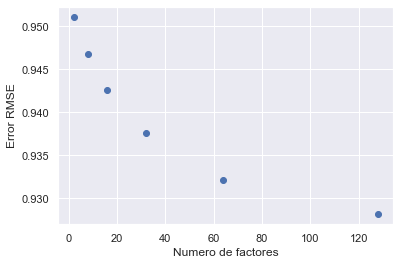

In [21]:
plt.scatter(factors, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [22]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': factors,'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)

In [23]:
gs.fit(data)

In [24]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9281758201253636
{'n_factors': 128, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}


### Modelo Final

In [25]:
algo2=SVD(n_factors=128)
algo2.fit(trainset)

In [26]:
algo2.fit(trainset)

In [27]:
prediction2=algo2.test(testset)

In [28]:
data_reviews_ok['Score_model']=data_reviews_ok['product_id'].apply(lambda x: algo2.predict(usuario,x).est)

In [31]:
accuracy.rmse(prediction2)

RMSE: 0.9252


0.9252078269713868

#### Interpretacion del resultado

El RMSE del modelo optimizado con hiperparametreos es 0.9252. Como se aproxima demasiado al modelo utilizado como benchmark, se toma el primero, dado que utiliza menos recursos y el resultado es practicamente el mismo. 

#### Recomendaciones

In [29]:
data_reviews_ok

,URL_NAME,product_id,Score_model
0,Batman_Arkham_Asylum_Game_of_the_Year_Edition,35140,1.920913
1,Shadows_of_Adam,506510,2.032625
2,LawBreakers,350280,1.964914
3,Witchinour,620900,1.890921
4,Recourse_Demo,431320,2.300522
...,...,...,...
9733,Air_Tactical,673760,2.165240
9734,Guards,460340,1.746982
9735,XIII_Century__Gold_Edition,34420,1.917802
9736,Crispy_Chicken,546380,1.912413


#### Top 10 Recomendaciones

In [30]:
data_reviews_ok.sort_values(by=['Score_model'], ascending=False).head(10)

,URL_NAME,product_id,Score_model
5684,Warface,291480,3.284598
7611,The_Dream_Machine_Chapter_1__2,94300,3.106190
7783,Nimble_Writer,348200,2.974076
8284,Liftoff,410340,2.971426
4753,Shovel_Knight_Treasure_Trove,250760,2.927052
5929,Sepia_Tears,429300,2.871267
8148,Sid_Meiers_Civilization_V,8930,2.855470
5726,SimplePlanes,397340,2.843076
9412,Geometry_Wars_3_Dimensions_Evolved,310790,2.833017
4195,Airships_Conquer_the_Skies,342560,2.812526


### Resultados esperados

Si bien el algoritmo funciona correctamente, y los resultados arrojados estan dentro de los limites considerables (entre 1 y 3) aprox, pienso que los resultados no son del todo confiables, dado que una de las variables mas importantes de este esquema (puntaje) esta calculado a partir de los comentarios que el usuario escribio. Esta practica, por su parte, podria estar arrojando errores dificiles de detectar. Esto no sucederia si la fuente de datos contara directamente con dicho puntaje.

### Conclusiones

-La precision del modelo segun la metrica seleccionada RSME es 0.92. Este numero se calcula en funcion de la cantidad de horas jugadas a cada producto y se valida con de un valor (tambien calculado) llamado Calif, que es obtenido utilizando el metodo polarity de la libreria de procesamiento de lenguaje natural **surprise**. La idea fue tomar los comentarios que cada usuario hizo sobre el juego y establecer un valor de 1 a 3 para indicar si le gusto o no, los juegos a los que jugo. Sabemos que el valor utilizado como input (Calif), tiene un margen de error que podria afectar la performance del modelo.

### Investigacion

Como se destaca en la anterior conclusion, un aspecto a mejorar es la forma en que se obtiene la calificacion de los juegos. 
Al ser un dato importante, no deberiamos predecirlo por medio de otra variable. Pienso que es algo que se podria mejorar desde el sistema que colecta los datos, quizas dando algun tipo de recomensa a aquellos usuarios que agregan una puntuacion a los juegos que prueban. 

#### Hipotesis

1. Al igual que sucede con el cine, una gran parte de los usuarios opta por jugar/mirar peliculas/juegos que pertenecen a un mismo genero. - Seria interesante constatar si esta hipotesis es cierta, realizando un modelo no supervisado, que nos permita clasificar los diferentes usuarios, en funcion de sus preferencias (rating/genero).

2. Las horas jugadas representan directamente cuanta afinidad tiene un usuario con cierto juego. Si jugo pocas horas no le gusta, si jugo muchas horas si. -Seria interesante constatar si esta hipotesis es cierta. De ser asi, los puntajes podrian ser determinar valor dinamico, en el sentido que dependiendo el periodo de tiempo, podriamos determinar que en cierto momento el usuario tiene preferencia por algo, pero en otro momento no. Sucede que con el tiempo, uno puede saturarse y cambiar considerablemente lo que elije consumir o comprar.

### Metodologia planteada para una proxima instancia:

-Sistema de Recomendacion por Filtro colaborativo utilizando un modelo diferente al utilizado en este proyecto.